In [13]:
# Random Forest Regressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy.random as rnd
from sklearn.ensemble import RandomForestRegressor

# Vanno addestrati presentando predittori e le etichette (caratteristiche)
# Usa più alberi decisioinali (ensemble)

In [14]:
hed = pd.read_csv("./code/boston.csv", index_col=0)
hed.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
# Creo distribuzione binomiale per dividere dentificare set di training al 70%
selection = rnd.binomial(1, 0.7, size=len(hed)).astype(bool)
training = hed[selection]
testing = hed[~selection]
print(len(hed),"=", len(training), "+", len(testing))

506 = 357 + 149


In [18]:
# Crea insiemi predittori con tutte le righe e le colonne da "CRIM" a "LSTAT" ossia le variabili
predictors_train = training.loc[:, "CRIM":"LSTAT"]
predictors_test = testing.loc[:, "CRIM":"LSTAT"]

In [19]:
# Crea il modello e ne fa il training sulla feature MEDV
feature = "MEDV"
model = RandomForestRegressor().fit(predictors_train, training[feature])

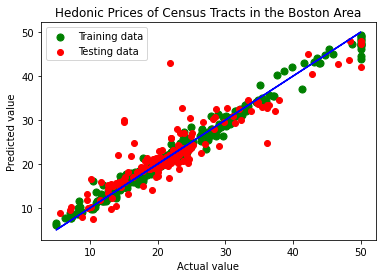

In [20]:
# Traccia i risultati della previsione
plt.scatter(training[feature], model.predict(predictors_train), c="green", s=50)
plt.scatter(testing[feature], model.predict(predictors_test), c="red")
plt.legend(["Training data", "Testing data"], loc="upper left")
plt.plot(training[feature], training[feature], c="blue")
plt.title("Hedonic Prices of Census Tracts in the Boston Area")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

In [ ]:
# Il valore previsto non è discreto quindi non possiamo usare una matrice di confusione per stabilire la qualità del modello